<a href="https://colab.research.google.com/github/seena7468/Practical_Application-5.1/blob/main/Required_Assignment_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [969]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [970]:
data = pd.read_csv('/content/sample_data/coupons.csv')

In [971]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [972]:
missing_data = data.isnull().sum()
print(missing_data)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [973]:
from textwrap import fill

#drop column car since almost all values are null
data.drop('car', axis=1, inplace=True)
#data.isnull().sum()

#replace missing values in column Bar/CoffeeHouse/CarryAway/RestaurantLessThan20/Restaurant20To50
fillvalues = {'Bar':data['Bar'].mode()[0],'CoffeeHouse':data['CoffeeHouse'].mode()[0],'CarryAway':data['CarryAway'].mode()[0],'RestaurantLessThan20':data['RestaurantLessThan20'].mode()[0],'Restaurant20To50':data['Restaurant20To50'].mode()[0]}
data.fillna(fillvalues, inplace=True)
#data.isnull().sum()


4. What proportion of the total observations chose to accept the coupon?



56.8% of total observation chose to accept the coupon


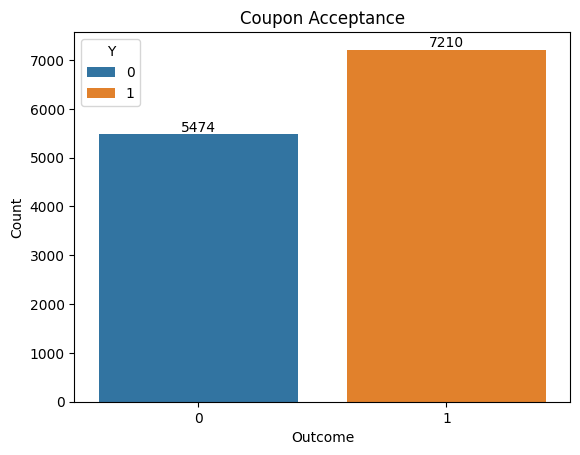

<Figure size 640x480 with 0 Axes>

In [974]:

proportion = data['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#print(proportion)
print(proportion[1] + ' of total observation chose to accept the coupon')


acceptance_rate = sns.countplot(x='Y', hue='Y', data=data)
acceptance_rate.set_xlabel('Outcome')
acceptance_rate.set_ylabel('Count')
acceptance_rate.set_title('Coupon Acceptance')
for cont in acceptance_rate.containers:
    acceptance_rate.bar_label(cont)
plt.show()
plt.savefig('acceptance_rate.png')


5. Use a bar plot to visualize the `coupon` column.

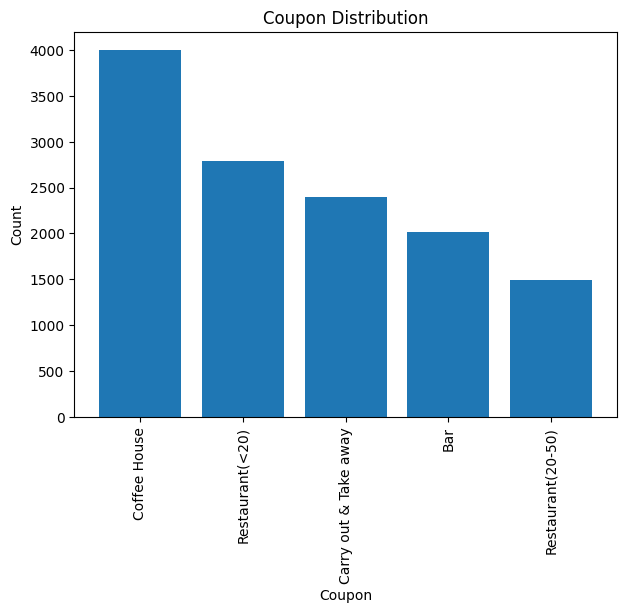

<Figure size 640x480 with 0 Axes>

In [975]:
#Bar plot
plt.figure(figsize=(7, 5))
plt.bar(data['coupon'].value_counts().index, data['coupon'].value_counts().values)
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Coupon Distribution')
plt.xticks(rotation=90)
plt.show()
plt.savefig('coupon_distribution.png')



6. Use a histogram to visualize the temperature column.

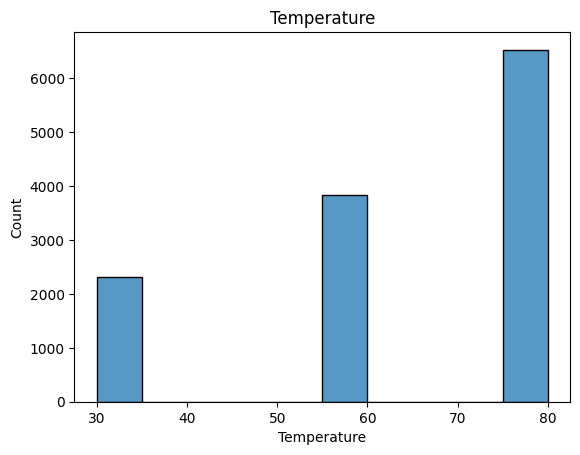

<Figure size 640x480 with 0 Axes>

In [976]:
sns_histPlot = sns.histplot(data=data, x='temperature', bins=3, binwidth=5)
sns_histPlot.set_xlabel('Temperature')
sns_histPlot.set_ylabel('Count')
sns_histPlot.set_title('Temperature')
plt.show()
plt.savefig('temperature_histogram.png')

#data['temperature'].value_counts()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [977]:
data_bar = data[data['coupon'] == 'Bar']
print(data_bar.shape)
data_bar.head()

(2017, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


Bar Coupns accepted: 41.0%


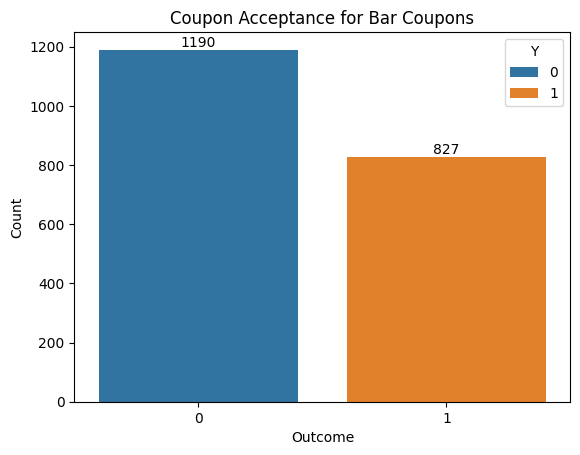

<Figure size 640x480 with 0 Axes>

In [978]:
bar_couponsAccepted = data_bar['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#print(bar_couponsAccepted)
print('Bar Coupns accepted: ' + bar_couponsAccepted[1])

sns_barPlot = sns.countplot(x='Y', hue='Y', data=data_bar)
sns_barPlot.set_xlabel('Outcome')
sns_barPlot.set_ylabel('Count')
sns_barPlot.set_title('Coupon Acceptance for Bar Coupons')
for cont in sns_barPlot.containers:
    sns_barPlot.bar_label(cont)
plt.show()
plt.savefig('coupon_acceptance_bar.png')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [979]:
bar_3orfewer = ['1~3', 'never', 'less1']
bar_others = ['4~8', 'gt8']

#Drivers who went to a bar 3 or fewer times a month
result_3orfewer = data_bar.query('Bar in @bar_3orfewer')
coupons_3orfewer = result_3orfewer['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(coupons_3orfewer[1] + ' - Coupon acceptance rate for drivers who went to a bar 3 or fewer times a month')


#Other drivers
result_moreThan3 = data_bar.query('Bar in @bar_others')
coupons_moreThan3 = result_moreThan3['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(coupons_moreThan3[1] + ' - Coupon acceptance rate for other drivers ')
print()

#Compare Coupon Acceptance rate
if (coupons_3orfewer[1] > coupons_moreThan3[1]):
  print('Coupon Acceptance rate for drivers who went to a bar 3 or fewer times a month is higher than other drivers')

else:
  print('Coupon Acceptance rate for drivers who went to a bar 3 or fewer times a month is lower than other drivers')



37.1% - Coupon acceptance rate for drivers who went to a bar 3 or fewer times a month
76.9% - Coupon acceptance rate for other drivers 

Coupon Acceptance rate for drivers who went to a bar 3 or fewer times a month is lower than other drivers


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [980]:

bar_onceAmonth = ['1~3','4~8', 'gt8']
bar_3orfewer = ['never', 'less1']
age_greaterthan25 = ['26','31','36','41','46','50plus']

#Drivers who go to a bar more than once a month and are over the age of 25
result_greaterthan25 = data_bar.query('age in @age_greaterthan25' and 'Bar in @bar_onceAmonth')
#print(result_greaterthan25['Y'].value_counts())
coupons_greaterthan25 = result_greaterthan25['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(coupons_greaterthan25[1] + ' - Coupon acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is ' )


#Other drivers
result_lessthan25 = data_bar.query('age < "25"' and 'Bar in @bar_3orfewer')
#print(result_lessthan25['Y'].value_counts())
coupons_lessthan25 = result_lessthan25['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(coupons_lessthan25[1] + ' - Coupon acceptance rate for other drivers is ')
print()

#Compare Coupon Acceptance rate
if (coupons_greaterthan25[1] > coupons_lessthan25[1]):
  print('Coupon Acceptance rate for drivers who go to a bar more than 3 times a month and are over the age of 25 is higher than other drivers')
else:
  print('Coupon Acceptance rate for drivers who go to a bar more than 3 times a month and are over the age of 25 is lower than other drivers')



68.8% - Coupon acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 
29.3% - Coupon acceptance rate for other drivers is 

Coupon Acceptance rate for drivers who go to a bar more than 3 times a month and are over the age of 25 is higher than other drivers


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [981]:
bar_morethanOnce = ['1~3','4~8', 'gt8']
bar_lessthanOnce = ['never', 'less1']

#Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
result_morethanOnce = data_bar.query(('Occupation != "Farming Fishing And Forestry"') and 'Bar in @bar_morethanOnce' and 'passanger != "Kid(s)"')
Coupun_Acceptance_morethanOnce = result_morethanOnce['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#print(result['Y'].value_counts())
print(Coupun_Acceptance_morethanOnce[1] + ' - Coupon acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry ')

#Other Drivers
result_lessthanOnce = data_bar.query(('Occupation == "Farming Fishing And Forestry"') and 'Bar in @bar_lessthanOnce' and 'passanger == "Kid(s)"')
Coupon_Acceptance_lessthanOnce = result_lessthanOnce['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#print(result_lessthanOnce['Y'].value_counts())
print(Coupon_Acceptance_lessthanOnce[1] + ' - Coupon acceptance rate for other drivers ')
print()

#Compare Coupon Acceptance rate
if (Coupun_Acceptance_morethanOnce[1] > Coupon_Acceptance_lessthanOnce[1]):
  print('Higher Coupon Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry than other drivers')

else:
  print('Lower Coupon Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry than other drivers')


43.3% - Coupon acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 
20.9% - Coupon acceptance rate for other drivers 

Higher Coupon Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry than other drivers


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [982]:
more_than_onceAmonth = ['1~3','4~8', 'gt8']

#Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
a_result = data_bar.query('Bar in @more_than_onceAmonth' and 'passanger != "Kid(s)"' and 'maritalStatus != "widowed"')
onceAmonth_NotKid_NotWindow = a_result['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(onceAmonth_NotKid_NotWindow[1] + ' - Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed')

#Drivers who go to bars more than once a month and are under the age of 30
#print(data_bar['age'].unique())
b_result= data_bar.query('Bar in @more_than_onceAmonth' and 'age < "30"')
onceAmonth_Under30 = b_result['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(onceAmonth_Under30[1] + ' - Coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30')


#Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
#print(data_bar['income'].unique())
c_result = data_bar.query('RestaurantLessThan20 == "4~8"' and 'income < "$50000"')
cheapRest_incomeLess50K = c_result['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(cheapRest_incomeLess50K[1] + ' - Coupon acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K')
print()

#Compare Coupon Acceptance rate
if (onceAmonth_NotKid_NotWindow[1] > onceAmonth_Under30[1] and onceAmonth_NotKid_NotWindow[1] > cheapRest_incomeLess50K[1]):
  print('Higher coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed')
elif (onceAmonth_Under30[1] > onceAmonth_NotKid_NotWindow[1] and onceAmonth_Under30[1] > cheapRest_incomeLess50K[1]):
  print('Higher coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30')
elif (cheapRest_incomeLess50K[1] > onceAmonth_NotKid_NotWindow[1] and cheapRest_incomeLess50K[1] > onceAmonth_Under30[1]):
  print('Higher coupon acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K')



41.0% - Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
49.8% - Coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30
42.4% - Coupon acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

Higher coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In general, drivers who go to back more than once a month accepted more coupons than rest of the drives. Following is the detailed breakdown.
- Drivers who go to Bar more more than 3 times a month accepted more coupons and
- Drivers over the age of 25 accepted more coupons than others eventhough they go to Bar less than 3 times also.
- Higher Coupon Acceptance rate observed for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry than other drivers
- Higher acceptance rate for drivers who go to bars more than once a month and are under the age of 30

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investgation using Coffee House Coupon**

In [983]:
#Data set with Coffee House Coupon
data_coffee = data[data['coupon'] == 'Coffee House']
data_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


1. Propotion of the Coffee Coupon Accepted





In [984]:
bar_couponsAccepted = data_coffee['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#print(bar_couponsAccepted)
print('Coffee Coupon acceptance rate: ' + bar_couponsAccepted[1])

Coffee Coupon acceptance rate: 49.9%


2. Compare the acceptance rate between male and unemployed with others



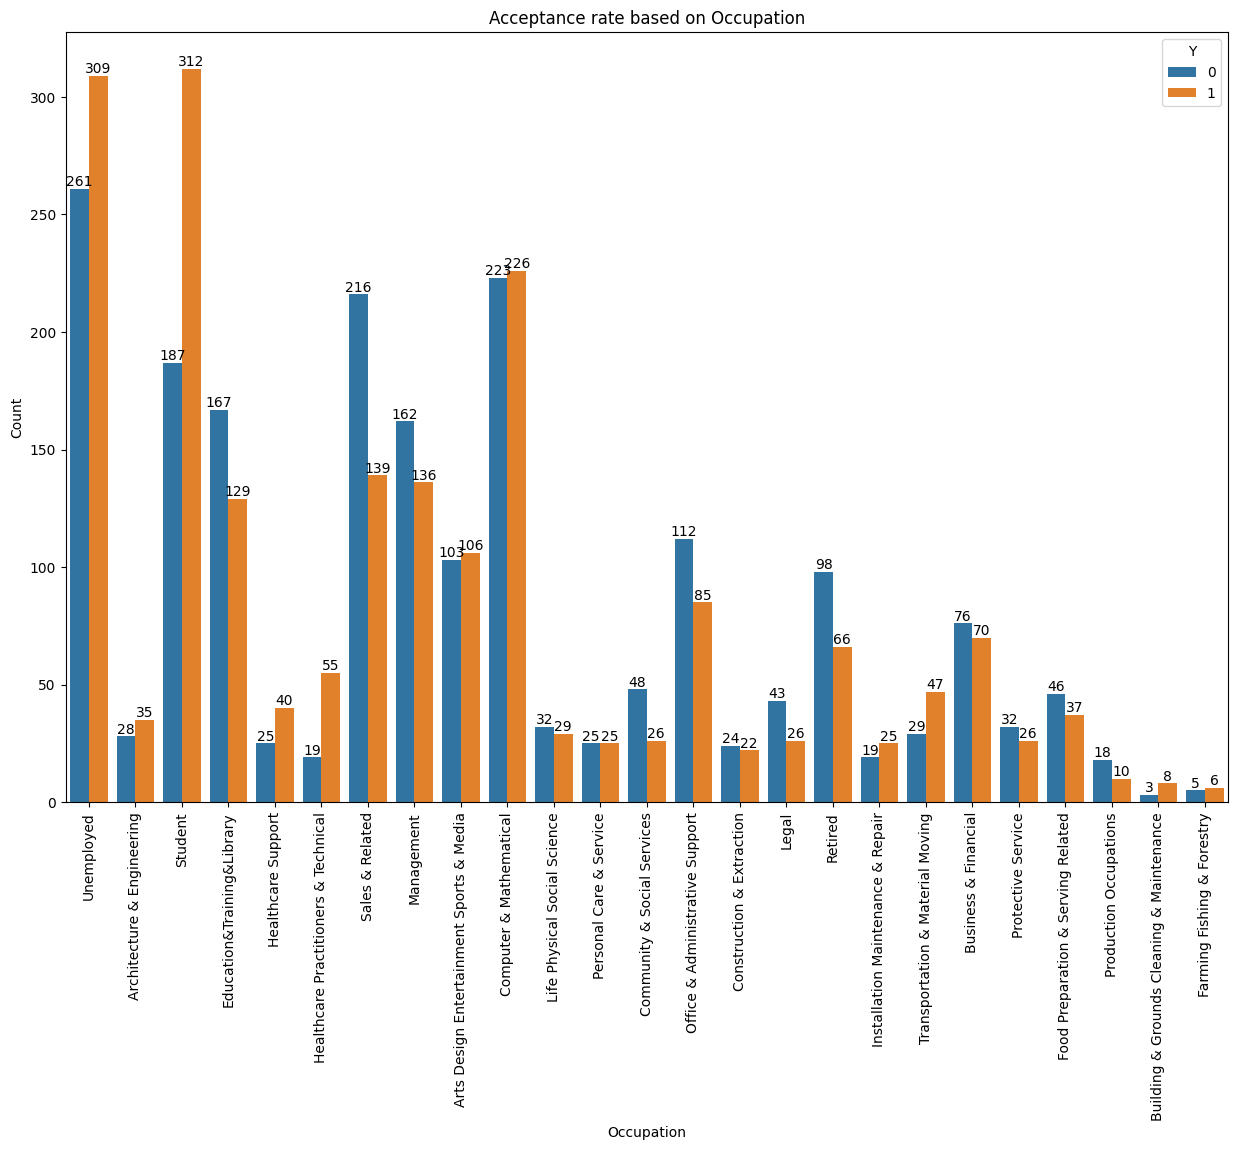

<Figure size 640x480 with 0 Axes>

In [985]:
#Coupon Acceptance Rate Based on occupation


fig = plt.figure(figsize=(15, 10))
sns_barPlot = sns.countplot(x='occupation', hue='Y', data=data_coffee)
sns_barPlot.set_xlabel('Occupation')
sns_barPlot.set_ylabel('Count')
sns_barPlot.set_title('Acceptance rate based on Occupation')
sns_barPlot.set_xticks(data_coffee['occupation'].unique())
label = data_coffee['occupation'].unique()
sns_barPlot.set_xticklabels(label, rotation=90)
for cont in sns_barPlot.containers:
    sns_barPlot.bar_label(cont)
plt.show()
plt.savefig('coupon_acceptance_coffee.png')



3. Compare the acceptance rate between male and unemployed with others

In [986]:
#Male
male = data_coffee.query('gender == "Male"')
male_acceptance = male['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Acceptance rate for males: '+ male_acceptance[1])

#Male and Unemplyed
male_unemployed = data_coffee.query('gender == "Male"' and 'occupation == "Unemployed"')
male_unemployed_acceptance = male_unemployed['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Acceptance rate for male and unemployed: '+ male_unemployed_acceptance[1])

#Others
others = data_coffee.query('gender != "Male"' and 'occupation != "Unemployed"')
others_acceptance = others['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Acceptance rate for others: '+ others_acceptance[1])


Acceptance rate for males: 50.6%
Acceptance rate for male and unemployed: 54.2%
Acceptance rate for others: 49.2%


4. Compare Acceptance rate for students vs others

In [987]:
students = data_coffee.query('occupation == "Student"')
students_acceptance = students['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Acceptance rate for students: '+ students_acceptance[1])

students = data_coffee.query('occupation != "Student"')
students_acceptance = students['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Acceptance rate for others: '+ students_acceptance[1])

stud_dest_NUP = data_coffee.query('occupation == "Student"' and 'destination == "No Urgent Place"')
stud_dest_NUP_acceptance = stud_dest_NUP['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Acceptance rate for students who go to No Urgent Place: '+ stud_dest_NUP_acceptance[1])

stud_dest_Home = data_coffee.query('occupation == "Student"' and 'destination == "Home"')
stud_dest_Home_acceptance = stud_dest_Home['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Acceptance rate for students who go to Home: '+ stud_dest_Home_acceptance[1])

students_dest_Work = data_coffee.query('occupation == "Student"' and 'destination == "Work"')
students_dest_Work_acceptance = students_dest_Work['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Acceptance rate for students who go to Work: '+ students_dest_Work_acceptance[1])




Acceptance rate for students: 62.5%
Acceptance rate for others: 48.1%
Acceptance rate for students who go to No Urgent Place: 58.1%
Acceptance rate for students who go to Home: 36.2%
Acceptance rate for students who go to Work: 44.6%
